In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [10]:
lmin, lmax = 160, 220
bmin, bmax = -70, -10
dl = db = 2
nl = (lmax-lmin)//dl
nb = (bmax-bmin)//db
l = np.linspace(lmin, lmax, nl)
b = np.linspace(bmin, bmax, nb)

v = np.linspace(-100, 100, 201)

rng = np.random.default_rng()
tmax = 10
T = rng.random(size=(l.size, b.size, v.size)) * tmax
print(T.shape)

(30, 30, 201)


# Fixed (l, b)

<IPython.core.display.Javascript object>


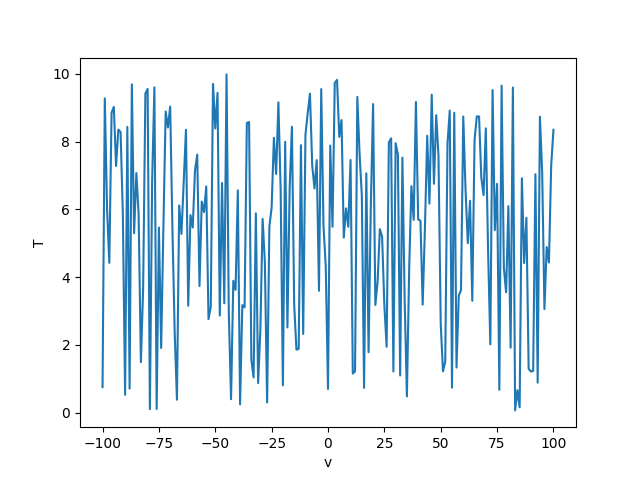

In [13]:
plt.figure()
plt.plot(v, T[0, 0])
plt.xlabel("v")
plt.ylabel("T")
plt.show()

# Average over v?

<IPython.core.display.Javascript object>


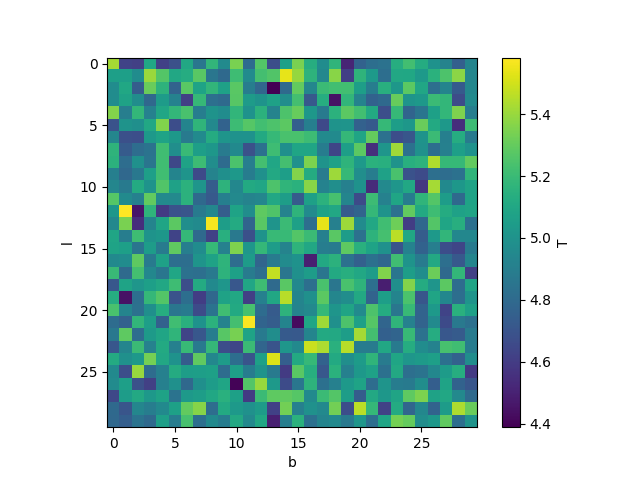

In [44]:
t_vavg = T.mean(axis=-1)
plt.figure()
plt.imshow(t_vavg)
plt.xlabel("b")
plt.ylabel("l")
plt.colorbar(label="T")
plt.show()

# 3D-plot, color = Temp

<IPython.core.display.Javascript object>


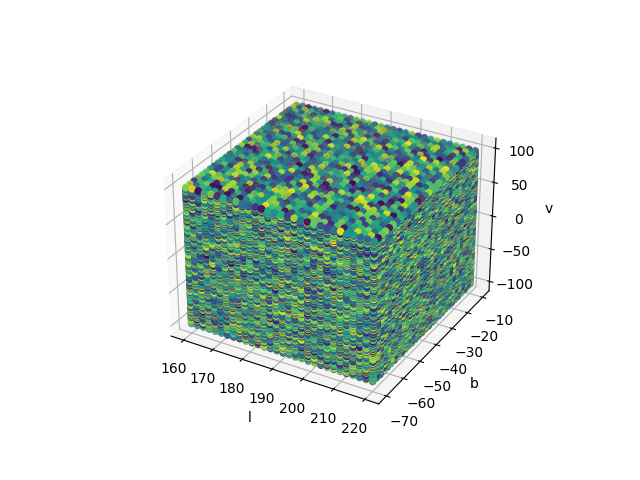

In [33]:

L, B, V = np.meshgrid(l, b, v)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(L, B, V, c=T.flatten())
ax.set_xlabel("l")
ax.set_ylabel("b")
ax.set_zlabel("v")
plt.show()

# 2D, weighted average

In [53]:
vel_avg = (T * v).sum(axis=-1)
vel_avg /= T.sum(axis=-1)

<IPython.core.display.Javascript object>


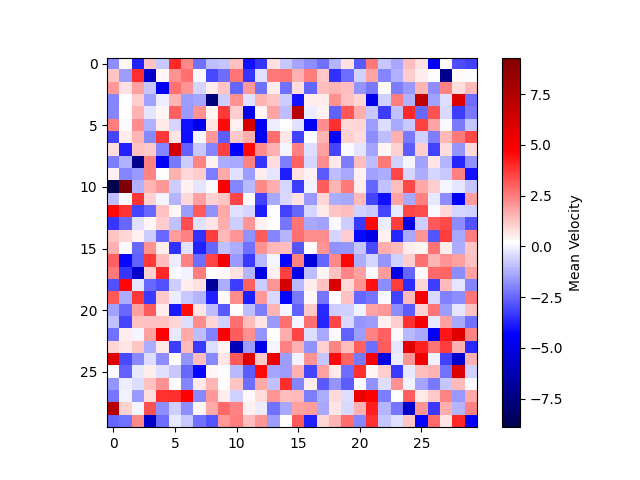

In [55]:
plt.figure()
plt.imshow(vel_avg, cmap="seismic")
plt.colorbar(label="Mean Velocity")
plt.show()

# color: mean v, size: temp

<IPython.core.display.Javascript object>


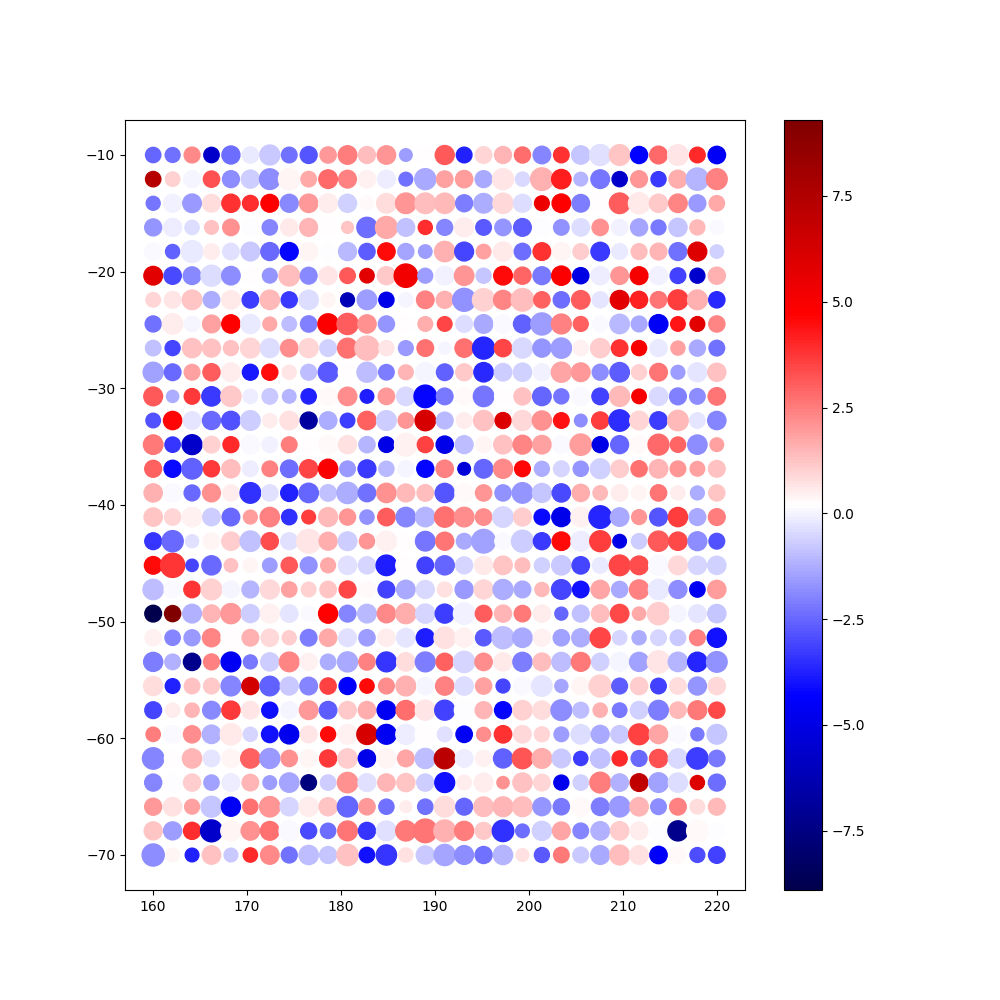

In [90]:
L, B = np.meshgrid(l, b)

plt.figure(figsize=(10,10))
plt.scatter(L, B, s=(T.mean(axis=-1))**6/100, c=vel_avg, cmap="seismic")
plt.colorbar()
plt.show()